# **PIZZA PLACE SALES ANALYSIS**

In [1]:
#Library importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Uploading Data Files
from google.colab import files
uploaded = files.upload()

Saving pizza_types.csv to pizza_types.csv
Saving pizzas.csv to pizzas.csv
Saving orders.csv to orders.csv
Saving order_details.csv to order_details.csv


In [3]:
#Load Datasets
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv', encoding='latin1')

### **Cleaning up 'orders' dataframe**

In [4]:
print(orders.head())

   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30


In [5]:
print("--- order's shape---")
print(orders.shape)

--- order's shape---
(21350, 3)


In [6]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB
None


In [7]:
# Checking for missing values
print('Missing values in orders:\n', orders.isnull().sum())

Missing values in orders:
 order_id    0
date        0
time        0
dtype: int64


In [8]:
# checking for duplicates
print('Duplicates in orders:', orders.duplicated().sum())

Duplicates in orders: 0


In [9]:
# Convert date and time formats
orders['date'] = pd.to_datetime(orders['date'])
orders['time'] = pd.to_datetime(orders['time'], format='%H:%M:%S').dt.time

### **Cleaning up 'orders_details' dataframe**

In [10]:
print(order_details.head())

   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1


In [11]:
print("--- order_details shape---")
print(order_details.shape)

--- order_details shape---
(48620, 4)


In [12]:
print(order_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [13]:
# Checking for missing values
print('Missing values in orders_details:\n', order_details.isnull().sum())

Missing values in orders_details:
 order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64


In [14]:
# checking for duplicates
print('Duplicates in order_details:', order_details.duplicated().sum())

Duplicates in order_details: 0


### **Cleaning up 'pizzas' dataframe**

In [15]:
print(pizzas.head())

     pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75


In [16]:
print("--- pizzas shape---")
print(pizzas.shape)

--- pizzas shape---
(96, 4)


In [17]:
print(pizzas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB
None


In [18]:
# Checking for missing values
print('Missing values in pizzas:\n', pizzas.isnull().sum())

Missing values in pizzas:
 pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64


In [19]:
# checking for duplicates
print('Duplicates in pizzas:', pizzas.duplicated().sum())

Duplicates in pizzas: 0


### **Cleaning up 'pizza_type' dataframe**

In [20]:
print(pizza_types.head())

  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  
1  Chicken, Artichoke, Spinach, Garlic, Jalapeno ...  
2  Chicken, Red Onions, Red Peppers, Mushrooms, A...  
3  Chicken, Tomatoes, Red Peppers, Spinach, Garli...  
4  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...  


In [21]:
print("--- pizza_types shape---")
print(pizza_types.shape)

--- pizza_types shape---
(32, 4)


In [22]:
print(pizza_types.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB
None


In [23]:
# Checking for missing values
print('Missing values in pizza_types:\n', pizza_types.isnull().sum())

Missing values in pizza_types:
 pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64


In [24]:
# checking for duplicates
print('Duplicates in pizza_types:', pizza_types.duplicated().sum())

Duplicates in pizza_types: 0


In [25]:
#Trimming whitespace
for col in ['pizza_type_id', 'name', 'category', 'ingredients']:
    pizza_types[col] = pizza_types[col].str.strip()

In [26]:
## Adding default Mozzarella Cheese and Tomato Sauce

def add_defaults_to_ingredient_string(ingredient_str):
    ingredients = [i.strip() for i in ingredient_str.split(',')]

    # Add Mozzarella Cheese if missing
    if 'Mozzarella Cheese' not in ingredients:
        ingredients.append('Mozzarella Cheese')

    # Add Tomato Sauce if no sauce is mentioned
    if not any('Sauce' in ing for ing in ingredients):
        ingredients.append('Tomato Sauce')

    return ', '.join(ingredients)

# Apply to the existing ingredients column
pizza_types['ingredients'] = pizza_types['ingredients'].apply(add_defaults_to_ingredient_string)

## *Merging Dataframes into one for analysis*

In [27]:
# Merging order_details with orders
df = pd.merge(order_details, orders, on='order_id', how='left')

# Merging with pizzas
df = pd.merge(df, pizzas, on='pizza_id', how='left')

# Merge with pizza_types
df = pd.merge(df, pizza_types, on='pizza_type_id', how='left')

In [28]:
print(df.head(5))

   order_details_id  order_id       pizza_id  quantity       date      time  \
0                 1         1     hawaiian_m         1 2015-01-01  11:38:36   
1                 2         2  classic_dlx_m         1 2015-01-01  11:57:40   
2                 3         2  five_cheese_l         1 2015-01-01  11:57:40   
3                 4         2    ital_supr_l         1 2015-01-01  11:57:40   
4                 5         2     mexicana_m         1 2015-01-01  11:57:40   

  pizza_type_id size  price                       name category  \
0      hawaiian    M  13.25         The Hawaiian Pizza  Classic   
1   classic_dlx    M  16.00   The Classic Deluxe Pizza  Classic   
2   five_cheese    L  18.50      The Five Cheese Pizza   Veggie   
3     ital_supr    L  20.75  The Italian Supreme Pizza  Supreme   
4      mexicana    M  16.00         The Mexicana Pizza   Veggie   

                                         ingredients  
0  Sliced Ham, Pineapple, Mozzarella Cheese, Toma...  
1  Pepperoni

## ANALYSIS PROPER

In [29]:
## Total revenue
df['revenue'] = df['price'] * df['quantity']
total_revenue = df['revenue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $817,860.05


In [30]:
## Total quantity sold
total_quantity = df['quantity'].sum()
print(f"Total Quantity Sold: {total_quantity}")

Total Quantity Sold: 49574


In [31]:
## Total number of orders
total_orders = df['order_id'].nunique()
print(f"Total Orders: {total_orders}")

Total Orders: 21350


In [32]:
## How many pizza types?
num_pizza_types = df['pizza_type_id'].nunique()
print(f"Number of Pizza Types: {num_pizza_types}")

Number of Pizza Types: 32


In [34]:
#Average price of pizzas
average_price = df['price'].mean()
print(f"Average Pizza Price:${average_price:.2f}")

Average Pizza Price:$16.49


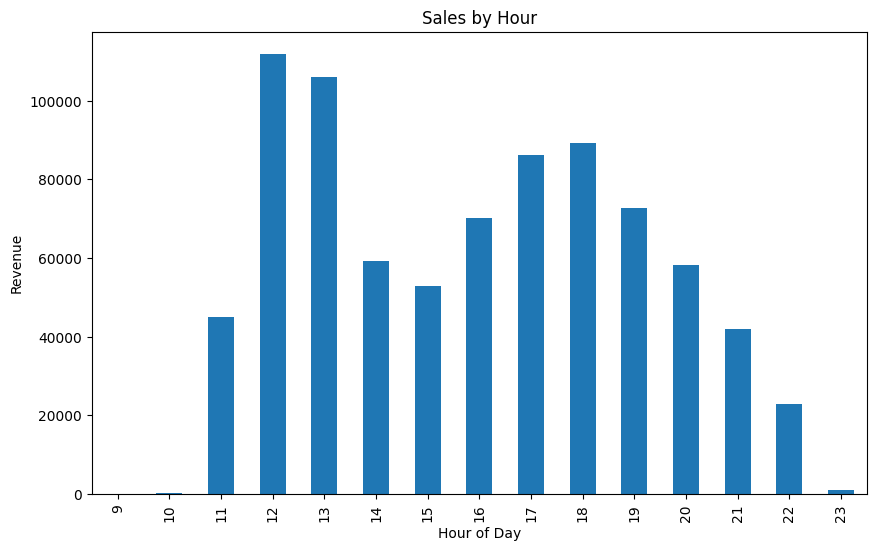

In [35]:
## Peak sales hours
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
peak_hours = df.groupby('hour')['revenue'].sum()
peak_hours.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue')
plt.show()

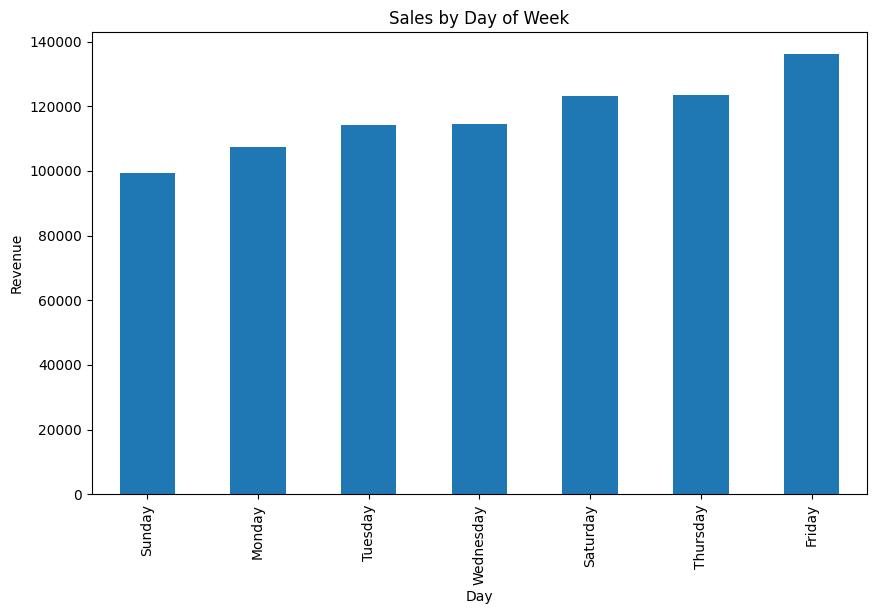

In [36]:
## Sales by day of the week
df['day_of_week'] = df['date'].dt.day_name()
sales_by_day = df.groupby('day_of_week')['revenue'].sum().sort_values()
sales_by_day.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Day of Week')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

In [37]:
## Top 5 bestselling pizzas
top_pizzas = df.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending=False).head(5)
print(top_pizzas)

pizza_type_id
classic_dlx    2453
bbq_ckn        2432
hawaiian       2422
pepperoni      2418
thai_ckn       2371
Name: quantity, dtype: int64


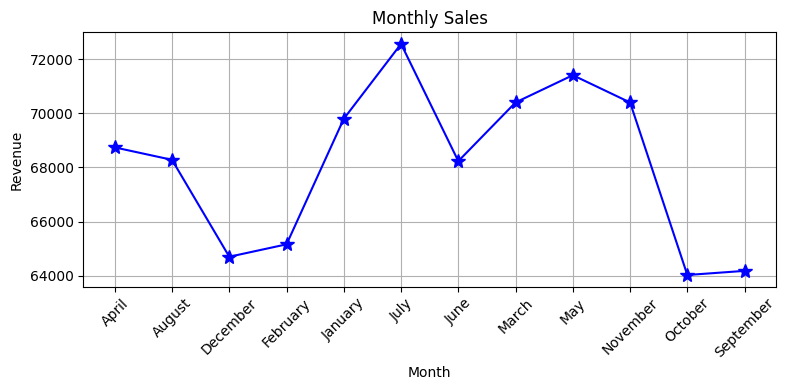

In [38]:
## Monthly sales trend
df['month'] = df['date'].dt.month_name()
monthly_sales = df.groupby('month')['revenue'].sum()
plt.figure(figsize=(8, 4))
plt.plot(monthly_sales.index, monthly_sales.values, marker='*', markersize=10, linestyle='-', color='blue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
## Poor performing pizzas
poor_pizzas = df.groupby('pizza_type_id')['quantity'].sum().sort_values().head(5)
print(poor_pizzas)

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64


# *Sales Analysis Insights*

## 1. Total Revenue 💰:
The business generated a total revenue of $817,860.05 over the recorded year.

## 2. Total Quantity Sold 📦:
A total of 49,574 pizzas were sold.

## 3. Total Number of Orders 🧾:
There were 21,350 individual orders placed.

## 4. Number of Unique Pizza Types 🍕:
The menu consists of 32 distinct pizza types.

## 5. Average Pizza Price 💵:
The average price of a pizza is $16.49.

## 6. Peak Hours of Sales:
- **Midday Peak:** Revenue spikes sharply around 12 PM–1 PM, with the highest single-hour sales at 12 PM. This suggests a strong lunch-time demand surge.  
- **Afternoon Dip:** After 1 PM, sales decline through mid-afternoon (2 PM–4 PM), indicating a lull between lunch and the early evening rush.  
- **Evening Recovery:** A secondary peak emerges between 5 PM–6 PM, likely driven by post-work consumers, before tapering off steadily into late night.

## 7. Sales by Day of the Week:
- **Weekend & End-of-Week Strength:** Friday leads all days in revenue, followed closely by Thursday and Saturday, showing a pronounced “end-of-week” spending boost.  
- **Early-Week Low:** Sunday records the lowest sales, with Monday and Wednesday also below the weekly average—pointing to slower consumer activity at the very start of the week.  
- **Mid-Week Consistency:** Tuesday and Wednesday hover just above Monday’s figures, suggesting moderate but stable mid-week performance.

## 8. Top 5 Bestselling Pizzas 🔥:
 Based on total quantity sold, the most popular pizzas in descending order are:

 Classic Deluxe: 2,453 sold

 BBQ Chicken: 2,432 sold

 Hawaiian: 2,422 sold

 Pepperoni: 2,418 sold

 Thai Chicken: 2,371 sold

## 9. Monthly Sales Trend :
- **Summer High:** July registers the peak monthly revenue, with June and August also performing strongly—indicative of a summer-season upswing.  
- **Spring Upswing:** A steady climb from February through May culminates in May's second-highest month, highlighting a springtime growth trend.  
- **Year-End Slump:** Revenues dip significantly in October and December, with December the lowest of the year, suggesting a slower holiday-period or inventory-related downturn.  

## 10. Poor performing pizza types ❌:
These pizzas sold the least and may need marketing attention or menu reconsideration:

Brie Carre: 490 sold

Mediterraneo: 934 sold

Calabrese: 937 sold

Spinach Supreme: 950 sold

Soppressata: 961 sold